# Principal Component Analysis
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.
## Exercise 1
Use the Dry Bean Dataset xlsx available on the github page of the labs.
- Divide your dataset into a train and a test set.
- Preprocess the data by centering the variables and dividing them by their standard deviation.
- Write your own algorithm to perform PCA on the variables.
- Using the training set, obtain and plot the eigenvalue spectrum using the log-scale for the y-axis. What number of principal components would you select?
- Project the data (training set) in the first two principal components and color by class. Do it also for three principal components.

For an increasing number of principal components (1 to 16):
- Apply a multinomial logistic regression to learn a model on the training set (use `sklearn.linar model.LogisticRegression`).
- Transform the test set with the matrix learned from the training set.
Make a prediction with the logistic model learned.
- Assess the quality of the predictions and comment on the results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from unsupervised_learning import swiss_roll
from unsupervised_learning.dimensionality_reduction import Pca

NameError: name 'int64' is not defined

In [ ]:
# Loading beans
beans = pd.read_excel('Unsupervised_Learning_2024/Datasets/Dry_Bean_Dataset.xlsx')

# Extracting labels
classes =np.array( beans['Class'])

# Removing labels
beans = np.array(beans.drop(['Class'], axis=1))


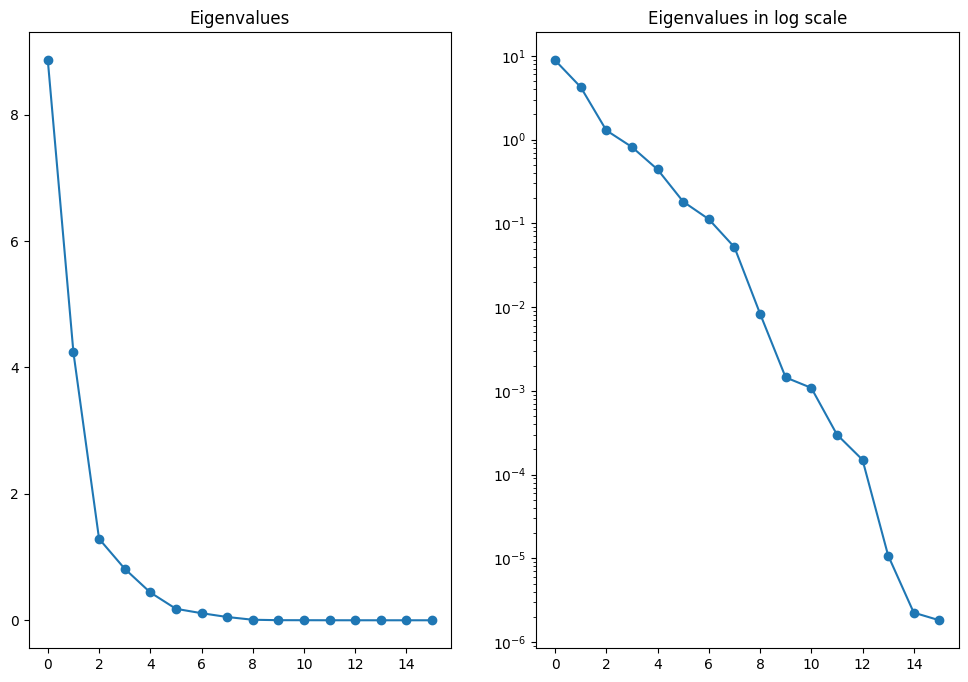

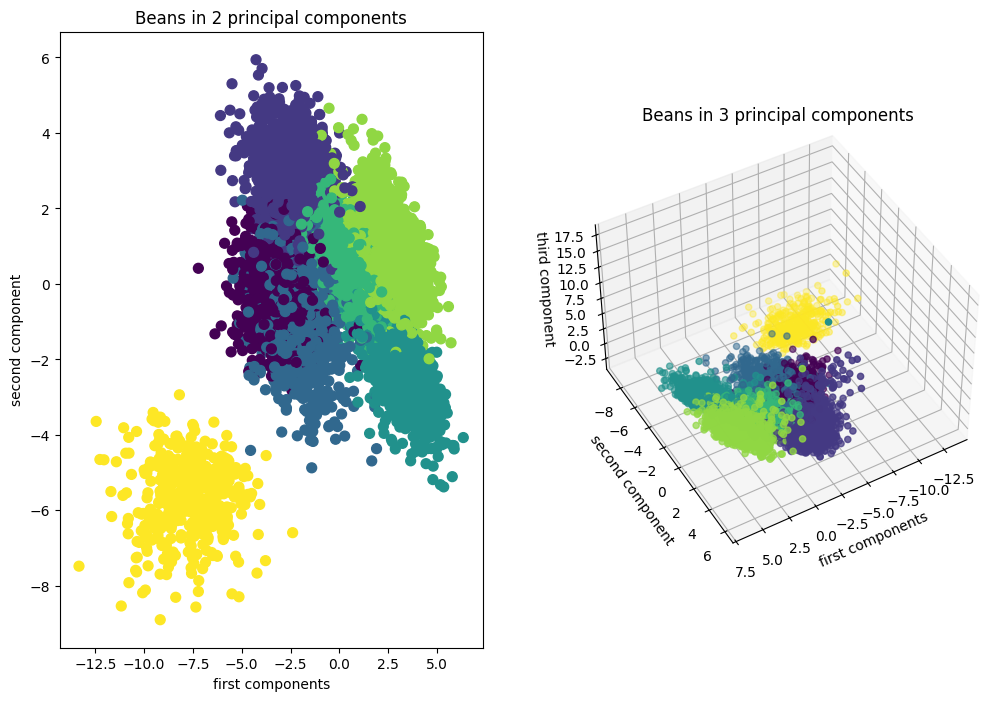

In [ ]:
pca = Pca(16)
# Separating train and test set
x_train, x_test, y_train, y_test = train_test_split(
    beans, classes, train_size=0.8)

# Scaling data
pca.fit(x_train)

# Plot eigenvalues
fig = plt.figure(figsize=(12, 8))
fig.add_subplot(1, 2,1)
plt.title("Eigenvalues")
plt.plot(pca.s, "o-")
fig.add_subplot(1,2,2)
plt.title("Eigenvalues in log scale")
plt.semilogy(pca.s, "o-")

# Project data
x_pca = pca.transform(x_train)
clr, _ = pd.factorize(y_train)

fig  = plt.figure(figsize=(12, 8))
fig.add_subplot(1,2,1)
plt.title("Beans in 2 principal components")
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clr, s=50)
plt.xlabel("first components")
plt.ylabel("second component")

ax =fig.add_subplot(1,2,2, projection='3d')
plt.title("Beans in 3 principal components")
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=clr)
ax.view_init(45, 60)
plt.xlabel("first components")
plt.ylabel("second component")
ax.set_zlabel("third component")
plt.show()

1: 0.6301872934263679
2: 0.8663239074550129
3: 0.8733015056922512
4: 0.8835842820418656
5: 0.9214102093279471
6: 0.9225119353654058
7: 0.9236136614028645
8: 0.9232464193903782
9: 0.922879177377892
10: 0.922879177377892
11: 0.922879177377892
12: 0.922879177377892
13: 0.922879177377892
14: 0.922879177377892
15: 0.922879177377892
16: 0.922879177377892


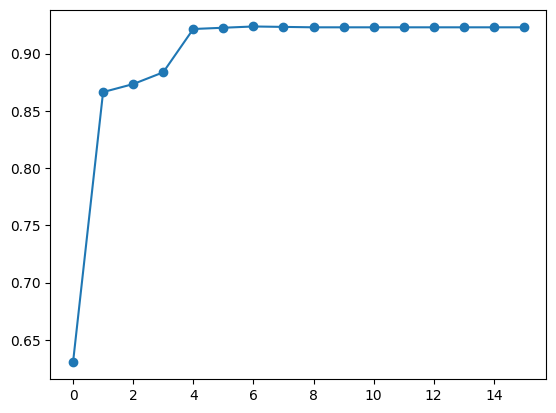

The maximum values of the accuaracy score is reached with 6 PCs and it is equal to 0.9236136614028645


In [ ]:
score = []
for i in range(x_pca.shape[1]):
    model = LogisticRegression(max_iter=1000)
    model.fit(x_pca[:,:i+1], y_train)
    x_test_pca = pca.transform(x_test)
    x_test_pca = x_test_pca[:,:i+1]
    y_pred = model.predict(x_test_pca)
    print(f"{i+1}: {model.score(x_test_pca, y_test)}")
    score.append(model.score(x_test_pca, y_test))
plt.plot(score, "o-")
plt.show()
print(f"The maximum values of the accuaracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

## Exercise 2
Try to apply PCA to the Swiss Roll dataset (n = 1000) from Lab 1 and plot the
projection on the first two principal components. Choose an appropriate color scheme for visualization and comment on your results.

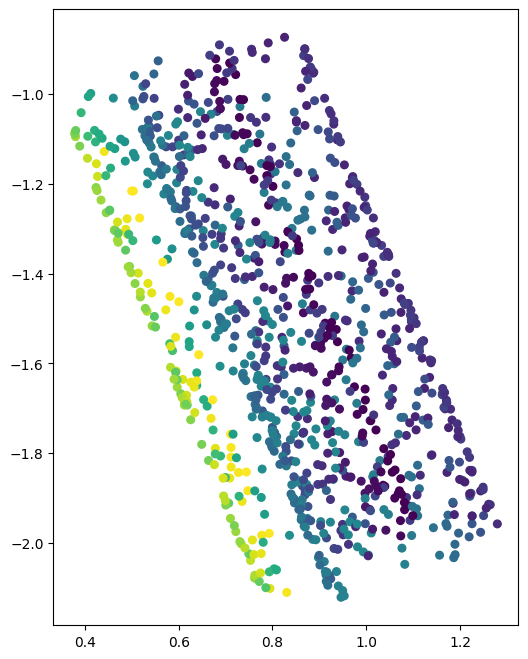

In [ ]:
data = swiss_roll(1000)
pca = Pca()
data_pca = pca.fit_transform(data)
clr = data[:,0]**2 + (data[:,1]+5)**2

plt.figure(figsize=(6,8))
plt.scatter(data_pca[:,0],data_pca[:,1], c=clr, s=30)
plt.show()